In [254]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import r2_score

In [255]:
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [256]:
df.shape

(500, 9)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [258]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [259]:
df.duplicated().sum()

np.int64(0)

In [260]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [261]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [262]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [263]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [264]:
y_train

,Chance of Admit
238,0.70
438,0.67
475,0.59
58,0.36
380,0.78
...,...
255,0.79
72,0.93
396,0.84
235,0.88


In [265]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.46      ,  0.5       ,  0.25      ,  0.375     ,  0.14285714,
         0.5224359 ,  0.        ],
       [ 0.44      ,  0.53571429,  0.5       ,  0.5       ,  0.42857143,
         0.53205128,  1.        ],
       [ 0.98      ,  0.96428571,  1.        ,  0.875     ,  0.71428571,
         0.92948718,  0.        ],
       [ 0.52      ,  0.53571429,  0.25      ,  0.625     ,  0.57142857,
         0.58974359,  1.        ],
       [ 0.7       ,  0.64285714,  0.75      ,  0.875     ,  0.71428571,
         0.69230769,  1.        ],
       [ 0.42      ,  0.32142857,  0.25      ,  0.375     ,  0.57142857,
         0.49358974,  1.        ],
       [ 0.6       ,  0.42857143,  0.5       ,  0.5       ,  0.57142857,
         0.62179487,  1.        ],
       [ 0.74      ,  0.39285714,  0.5       ,  0.75      ,  0.71428571,
         0.48076923,  1.        ],
       [ 0.62      ,  0.67857143,  0.5       ,  0.625     ,  0.71428571,
         0.65064103,  1.        ],
       [ 0.56      ,  0.5   

In [266]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [267]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [268]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0788 - mae: 0.2305 - val_loss: 0.0527 - val_mae: 0.1827
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0587 - mae: 0.2040 - val_loss: 0.0446 - val_mae: 0.1714
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0461 - mae: 0.1799 - val_loss: 0.0374 - val_mae: 0.1541
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0377 - mae: 0.1606 - val_loss: 0.0314 - val_mae: 0.1395
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0318 - mae: 0.1453 - val_loss: 0.0258 - val_mae: 0.1272
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0258 - mae: 0.1328 - val_loss: 0.0210 - val_mae: 0.1146
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0205 - mae: 0.1172 - val_loss: 0.0174 - val_mae: 0.1039
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0173 - mae: 0.1055 - val_loss: 0.0150 - val_mae: 0.0970
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [269]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [270]:

r2_score(y_test,y_pred)

0.8031240201838044

In [271]:
def plot_training_history(history):

    acc = history.history['mae']
    val_acc = history.history['val_mae']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation mae
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training mae')
    plt.plot(epochs_range, val_acc, label='Validation mae')
    plt.legend(loc='lower right')
    plt.title('Training and Validation mae')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

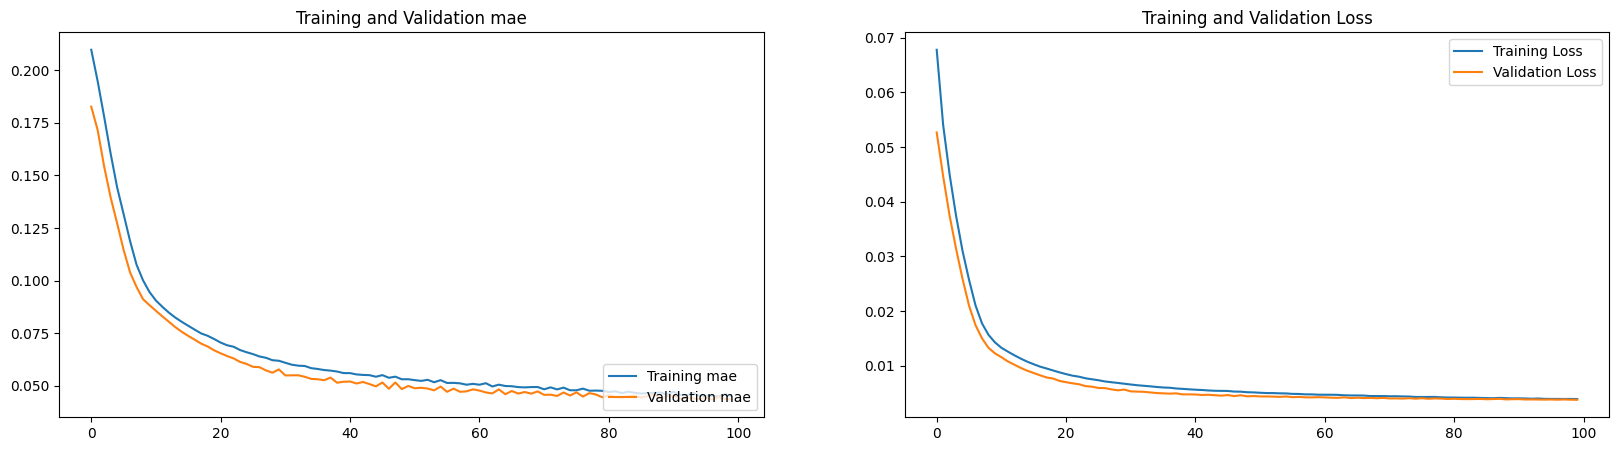

In [272]:
plot_training_history(history)